<a href="https://colab.research.google.com/github/kimhwijin/TensorflowWithKeras/blob/master/CNN/VGG16_ImageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

In [7]:
def build(weights_path=None):
  model = models.Sequential()
  model.add(layers.ZeroPadding2D(1,1), input_shape=(224,224,3))
  model.add(layers.Convolution2D(64, (3,3), activation='relu'))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(64, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(128, (3,3), activation='relu'))

  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(128, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(256, (3,3), activation='relu'))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(256, (3,3), activation='relu'))

  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(256, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(512, (3,3), activation='relu'))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(512, (3,3), activation='relu'))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(512, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(512, (3,3), activation='relu'))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(512, (3,3), activation='relu'))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(512, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

  model.add(layers.Flatten())

  #vgg 최상위 계층
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(1000,activation='softmax'))

  if weights_path:
    model.load_weights(weights_path)
  return model

In [16]:
drive_dir = 'drive/MyDrive/Colab Notebooks/'
#img_dir = drive_dir + '/image_datas/cat285.jpg'
#img_dir = drive_dir + '/image_datas/train820.jpg'
img_dir = drive_dir + '/image_datas/cat285.jpg'
im = cv2.resize(cv2.imread(img_dir), (224,224)).astype(np.float32)
im = np.expand_dims(im, axis =0)

model = VGG16(weights='imagenet', include_top=True)
model.compile(optimizer='sgd', loss='categorical_crossentropy')

464


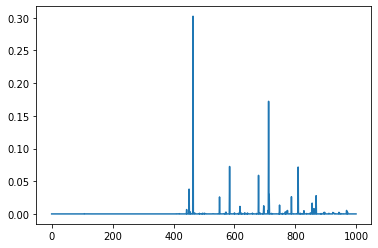

In [14]:
out = model.predict(im)
index = np.argmax(out)
print(index)

plt.plot(out.ravel())
plt.show()

In [17]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#모델 재활용
base_model = VGG16(weights='imagenet', include_top=True)
print(base_model)
for i , layer in enumerate(base_model.layers):
  print(i, layer.name, layer.output_shape)


0 input_7 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


In [18]:
#block4_pool 블록에서 feature 추출
model = models.Model(inputs=base_model.input,outputs=base_model.get_layer('block4_pool').output)
img_path = img_dir
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#이블록에서 feature 가져오기
features = model.predict(x)
print(features)


[[[[  0.          0.         39.35796   ...   0.         16.966978
      0.       ]
   [  0.          0.          0.        ...   0.        113.09012
      0.       ]
   [  0.          0.          0.        ...   0.         37.012146
      0.       ]
   ...
   [  0.          0.          0.        ...   0.        326.4104
      0.       ]
   [  0.          0.         64.13715   ...   0.        493.87878
      0.       ]
   [  0.          0.        108.555435  ...   0.        229.08469
      0.       ]]

  [[  0.          0.         45.328106  ...   0.         70.422905
      0.       ]
   [  0.          0.          0.        ...   0.        102.91939
      0.       ]
   [  0.          0.          0.        ...   0.         47.795708
      0.       ]
   ...
   [  0.          0.        165.1672    ...   0.          0.
      0.       ]
   [  0.          0.          0.        ...   0.        460.68292
      0.       ]
   [  0.          0.        223.93097   ...   0.        617.19006
      0